# 형태소 분석 및 워드클라우드

install file : java_jdk
pip install graphviz
pip install konlpy
pip install wordcloud (따로 설치 하던 중 붉은 글씨로 Microsoft Visual C++ 14.0 is required. Get it with "Microsoft Visual C++ Build Tools": 라는 에러가 나오면 Visual C++ Build Tools 설치할 것)

In [1]:
import scipy as sp  
import pandas as pd
import numpy as np

# 그래프 - 자연어처리는 항상 그래프를 그려 단어 빈도 측정
%matplotlib inline
import os

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

import nltk # 파이썬 자연어 처리, nltk = nature langauge tool kit

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
                
rc('font', family=font_name)

# 코드 실행시 발생하는 Warnings 없애주는 것
import warnings  
warnings.filterwarnings('ignore')

In [2]:
# Konlpy : 한글 자연어 처리 라이브러리!!! 
from konlpy.tag import Kkma       ; kkma = Kkma() # kkma()라는 클래스 안에서 kkma라는 객체를 생성하여 사용하겠다는 의미
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()  # Okt()라는 클래스 안에서 t라는 객체를 생성하여 아래에서 계속 쓰겠다고 표현
from konlpy.tag import *
import pickle

In [3]:
df_r = pd.read_excel("blog_내용 크롤링.xlsx") # 저장된 엑셀 열기
df_r

,Unnamed: 0,title,nickname,datetime,content
0,0,"[EPL 프리뷰] 연승 끊긴 맨유, 동기부여 잃은 크리스탈팰리스를 만나다! (크팰 ...",훈\n(shfovkeh),2020. 7. 15. 19:35,챔피언스리그 진출을 노리고 있는 맨유가\n이미 잔류가 확정되어 동기부여를 잃은\n크...
1,1,2020/2021 시즌 맨체스터 유나이티드 홈 유니폼 이벤트,DHL,2020. 7. 20. 10:19,2011년부터 DHL은 맨체스터 유나이티드의 공식 물류 파트너로 활동하고 있습니다....
2,2,2019-20 프리미어리그 36R,TSS\n(wjssha),2020. 7. 16. 12:05,지난 사우스햄튼 경기를 2-2로 비기면서 맨유는 챔피언스리그 진출권 도약에 실패했다...
3,3,2차 창작 서보원,마타롱,2020. 7. 20. 5:37,1. 경기 정보\n2020.07.20. 월 02:00 (한국 시간)\n웸블리 스타디...
4,4,"[vs 사우스햄튼] 기회를 놓친 맨유, 언성 히어로 집단 사우스햄튼",Hakang,2020. 7. 17. 8:48,"# 하센휘틀, 언성히어로 어벤져스를 만들었나\n참 유감스럽고 아쉬운 장면이 많았던 ..."
...,...,...,...,...,...
71,92,NaN,큐브,2020. 7. 18. 16:02,▶ 맨체스터 유나이티드 FC - 5위\n - 최근 크리스탈 팰리스 전에서 2:0 ...
72,93,크리스탈팰리스 vs 맨유,탱크,2020. 7. 16. 11:19,크리스탈 팰리스\n크리스탈 팰리스는 5연패를 기록하고있습니다. 강등은 안되겠지만 분...
73,94,맨유 라리가 윙어 영입 관심?,Aiden,2020. 7. 18. 0:09,맨유 오야르사발 영입 관심 ▶ 산초 실패시 소시에다드 윙어 추진한다 ◀ 홍보 활동으...
74,95,케인 맨유 원해,다이어트 박사\n(rlaqnska7),2020. 7. 20. 14:57,안녕하세요\n욥너에\n맨유가\n케인을 원하다고 합니다~ 역시\n케인\n17골 대박 ...


In [4]:
df_r['content'] # 형태소 분석을 원하는 content 부분만 따로 떼서 확인

0     챔피언스리그 진출을 노리고 있는 맨유가\n이미 잔류가 확정되어 동기부여를 잃은\n크...
1     2011년부터 DHL은 맨체스터 유나이티드의 공식 물류 파트너로 활동하고 있습니다....
2     지난 사우스햄튼 경기를 2-2로 비기면서 맨유는 챔피언스리그 진출권 도약에 실패했다...
3     1. 경기 정보\n2020.07.20. 월 02:00 (한국 시간)\n웸블리 스타디...
4     # 하센휘틀, 언성히어로 어벤져스를 만들었나\n참 유감스럽고 아쉬운 장면이 많았던 ...
                            ...                        
71    ▶ 맨체스터 유나이티드 FC - 5위\n  - 최근 크리스탈 팰리스 전에서 2:0 ...
72    크리스탈 팰리스\n크리스탈 팰리스는 5연패를 기록하고있습니다. 강등은 안되겠지만 분...
73    맨유 오야르사발 영입 관심 ▶ 산초 실패시 소시에다드 윙어 추진한다 ◀ 홍보 활동으...
74    안녕하세요\n욥너에\n맨유가\n케인을 원하다고 합니다~ 역시\n케인\n17골 대박 ...
75    토트넘 레스터시티 하이라이트3:0 -  7월20일 프리미어리그  한국어해설 - 손흥...
Name: content, Length: 76, dtype: object

In [5]:
content_list = df_r.content.values.tolist() # 지금 선정한 전체값들을 list로 변환

print(len(content_list))
content_list # 이작업을 한것은 list로 바꾼것을 나중에 하나의 문장으로 바꾸기 위해서

76


["챔피언스리그 진출을 노리고 있는 맨유가\n이미 잔류가 확정되어 동기부여를 잃은\n크리스탈 팰리스를 만납니다.\n무려 3경기 연속 3골차 승리라는 '최초의'\n기록을 만들었던 맨유가 사우스햄튼을 만나\n통한의 동점골을 내주면서 상승세가 한풀\n꺾여버렸습니다.\n만약 소튼전을 승리했다면, 리그 35라운드 기준\n단독 리그 3위로 올라설 수 있는 기회였으나\n맨유가 한 실점 중 OPTA가 기록한 이례\n가장 늦은 시간 실점을 허용하며, 챔피언스리그\n진출은 말 그대로 개싸움판이 되었습니다.\n현재 리그 3위 첼시, 4위 레스터시티 두 팀 모두\n경기력이 확연히 하락세임을 감안하면 여전히\n맨유의 챔피언스리그 진출 확률은 가장\n높게 평가되지만, 리그 38라운드가 경쟁팀인\n레스터시티와의 경기인만큼 챔피언스리그\n진출을 확신하기에는 아직 부족해보입니다.\n반면, 크리스탈 팰리스는 리그 35라운드 기준\n승점 42점으로 현재 강등권에 위치한 18위\n본머스가 남은 경기 전승을 거둬도 승점\n40점으로 이미 잔류를 확정지은 상황입니다.\n프로 선수들인만큼 동기부여를 하는데에\n자신들만의 방법이 있겠지만, 아무래도\n챔피언스리그 진출이라는 확실한 당근이있는\n맨유보다는 동기부여가 떨어질 수 밖에\n없는 상황으로 보입니다. 참고로 크리스탈 팰리스는 지난 6월 현재\n독일 2부리그 홀슈타인 킬에서 뛰고있는\n이재성 선수를 원한다는 이적설이 있었으며\n현재 감독은 로이 호지슨 감독으로 이청용\n선수가 팀을 떠날 당시에 이청용 선수를\n사실상 전력외 취급했던 감독입니다. 메시 선수처럼 보이는 이 선수는 한 때\nFIFA와 위닝 게임 시리즈에서 유망주로\n한 번쯤은 영입해봤을법한 샬케04 출신\n막스 마이어 선수입니다.\n크리스탈 팰리스라는 소규모 클럽이\n무려 주급이 17만 파운드라는 엄청난 금액을\n제시하면서 FA로 모셔온 스타지만 밥값을\n전혀 하지못하는 중입니다.\n저도 한동안 잊고 지내다 우연히 사진을\n보고 생각이 나 언급해보았습니다. 사실상 크리스탈 팰리스는 맨유에

In [6]:
# 리스트 중 str 타입이 아닌 요소들이 존재함을 확인
for i in content_list:
    if type(i) == float:
        i = str(i)

In [7]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라! (종종 문자열이 아닌것도 존재)
for i in range(len(content_list)):
    if type(content_list[i]) != str:  
        content_list[i] = str(content_list[i])

In [8]:
len(content_list)

76

In [9]:
# 나눠져 있는 문장을 한개의 문장으로 합치는 작업

content_text = '' # 빈 문자열


for each_line in content_list[:76]: # 수집한 context 개수 만큼  content_list[] 안의 숫자를 변경
    content_text = content_text + each_line + '\n' # for문을 통해서 빈 문자열에 계속 넣도록 함

In [10]:
content_text # 하나의 문장에 가공이 끝난 모든 문장을 합치도록 함

'챔피언스리그 진출을 노리고 있는 맨유가\n이미 잔류가 확정되어 동기부여를 잃은\n크리스탈 팰리스를 만납니다.\n무려 3경기 연속 3골차 승리라는 \'최초의\'\n기록을 만들었던 맨유가 사우스햄튼을 만나\n통한의 동점골을 내주면서 상승세가 한풀\n꺾여버렸습니다.\n만약 소튼전을 승리했다면, 리그 35라운드 기준\n단독 리그 3위로 올라설 수 있는 기회였으나\n맨유가 한 실점 중 OPTA가 기록한 이례\n가장 늦은 시간 실점을 허용하며, 챔피언스리그\n진출은 말 그대로 개싸움판이 되었습니다.\n현재 리그 3위 첼시, 4위 레스터시티 두 팀 모두\n경기력이 확연히 하락세임을 감안하면 여전히\n맨유의 챔피언스리그 진출 확률은 가장\n높게 평가되지만, 리그 38라운드가 경쟁팀인\n레스터시티와의 경기인만큼 챔피언스리그\n진출을 확신하기에는 아직 부족해보입니다.\n반면, 크리스탈 팰리스는 리그 35라운드 기준\n승점 42점으로 현재 강등권에 위치한 18위\n본머스가 남은 경기 전승을 거둬도 승점\n40점으로 이미 잔류를 확정지은 상황입니다.\n프로 선수들인만큼 동기부여를 하는데에\n자신들만의 방법이 있겠지만, 아무래도\n챔피언스리그 진출이라는 확실한 당근이있는\n맨유보다는 동기부여가 떨어질 수 밖에\n없는 상황으로 보입니다. 참고로 크리스탈 팰리스는 지난 6월 현재\n독일 2부리그 홀슈타인 킬에서 뛰고있는\n이재성 선수를 원한다는 이적설이 있었으며\n현재 감독은 로이 호지슨 감독으로 이청용\n선수가 팀을 떠날 당시에 이청용 선수를\n사실상 전력외 취급했던 감독입니다. 메시 선수처럼 보이는 이 선수는 한 때\nFIFA와 위닝 게임 시리즈에서 유망주로\n한 번쯤은 영입해봤을법한 샬케04 출신\n막스 마이어 선수입니다.\n크리스탈 팰리스라는 소규모 클럽이\n무려 주급이 17만 파운드라는 엄청난 금액을\n제시하면서 FA로 모셔온 스타지만 밥값을\n전혀 하지못하는 중입니다.\n저도 한동안 잊고 지내다 우연히 사진을\n보고 생각이 나 언급해보았습니다. 사실상 크리스탈 팰리스는 맨유

## 여기까지 데이터 전처리 작업

In [11]:
# knolpy 라는 라이브러리에 Okt 모듈( =t) 중에 
# morphs 라는 메소드를 사용 = 이것은 글들을 쪼개서 형태소 분석을 하는 것, 형태소란 언어에 있어서 "최소 의미 단위"를 말한다. 
# nonus 라는 메소드는 명사만을 가져온다.

tokens_ko = t.morphs(content_text) 
tokens_ko

['챔피언스리그',
 '진출',
 '을',
 '노리',
 '고',
 '있는',
 '맨유',
 '가',
 '\n',
 '이미',
 '잔류',
 '가',
 '확정',
 '되어',
 '동기부여',
 '를',
 '잃은',
 '\n',
 '크리스탈',
 '팰리스',
 '를',
 '만납니다',
 '.',
 '\n',
 '무려',
 '3',
 '경기',
 '연속',
 '3',
 '골차',
 '승리',
 '라는',
 "'",
 '최초',
 '의',
 "'",
 '\n',
 '기록',
 '을',
 '만들었던',
 '맨유',
 '가',
 '사우스햄튼',
 '을',
 '만나',
 '\n',
 '통한',
 '의',
 '동점골',
 '을',
 '내주면서',
 '상승세',
 '가',
 '한풀',
 '\n',
 '꺾여',
 '버렸습니다',
 '.',
 '\n',
 '만약',
 '소',
 '튼전을',
 '승리',
 '했다면',
 ',',
 '리그',
 '35',
 '라운드',
 '기준',
 '\n',
 '단독',
 '리그',
 '3',
 '위로',
 '올라설',
 '수',
 '있는',
 '기회',
 '였으나',
 '\n',
 '맨유',
 '가',
 '한',
 '실점',
 '중',
 'OPTA',
 '가',
 '기록',
 '한',
 '이례',
 '\n',
 '가장',
 '늦은',
 '시간',
 '실점',
 '을',
 '허용',
 '하며',
 ',',
 '챔피언스리그',
 '\n',
 '진출',
 '은',
 '말',
 '그대로',
 '개싸움',
 '판이',
 '되었습니다',
 '.',
 '\n',
 '현재',
 '리그',
 '3',
 '위',
 '첼시',
 ',',
 '4',
 '위',
 '레스터',
 '시티',
 '두',
 '팀',
 '모두',
 '\n',
 '경기',
 '력',
 '이',
 '확',
 '연히',
 '하락',
 '세',
 '임',
 '을',
 '감안',
 '하면',
 '여전히',
 '\n',
 '맨유',
 '의',
 '챔피언스리그',
 '진출',
 '확률',
 '은',
 '

In [12]:
ko = nltk.Text(tokens_ko)   # nltk = 빈도 분석 매서드 사용을 위해, nltk.Text를 하면 토큰화(token)(텍스트분석의기본단위)가 된다.
print(len(ko.tokens))          # 토큰 전체 갯수

60475


In [13]:
ko.tokens 

['챔피언스리그',
 '진출',
 '을',
 '노리',
 '고',
 '있는',
 '맨유',
 '가',
 '\n',
 '이미',
 '잔류',
 '가',
 '확정',
 '되어',
 '동기부여',
 '를',
 '잃은',
 '\n',
 '크리스탈',
 '팰리스',
 '를',
 '만납니다',
 '.',
 '\n',
 '무려',
 '3',
 '경기',
 '연속',
 '3',
 '골차',
 '승리',
 '라는',
 "'",
 '최초',
 '의',
 "'",
 '\n',
 '기록',
 '을',
 '만들었던',
 '맨유',
 '가',
 '사우스햄튼',
 '을',
 '만나',
 '\n',
 '통한',
 '의',
 '동점골',
 '을',
 '내주면서',
 '상승세',
 '가',
 '한풀',
 '\n',
 '꺾여',
 '버렸습니다',
 '.',
 '\n',
 '만약',
 '소',
 '튼전을',
 '승리',
 '했다면',
 ',',
 '리그',
 '35',
 '라운드',
 '기준',
 '\n',
 '단독',
 '리그',
 '3',
 '위로',
 '올라설',
 '수',
 '있는',
 '기회',
 '였으나',
 '\n',
 '맨유',
 '가',
 '한',
 '실점',
 '중',
 'OPTA',
 '가',
 '기록',
 '한',
 '이례',
 '\n',
 '가장',
 '늦은',
 '시간',
 '실점',
 '을',
 '허용',
 '하며',
 ',',
 '챔피언스리그',
 '\n',
 '진출',
 '은',
 '말',
 '그대로',
 '개싸움',
 '판이',
 '되었습니다',
 '.',
 '\n',
 '현재',
 '리그',
 '3',
 '위',
 '첼시',
 ',',
 '4',
 '위',
 '레스터',
 '시티',
 '두',
 '팀',
 '모두',
 '\n',
 '경기',
 '력',
 '이',
 '확',
 '연히',
 '하락',
 '세',
 '임',
 '을',
 '감안',
 '하면',
 '여전히',
 '\n',
 '맨유',
 '의',
 '챔피언스리그',
 '진출',
 '확률',
 '은',
 '

In [14]:
ko.vocab().most_common(100)    # 상위에서 가장 많이 나온 단어(토큰) 100개 및 얼만큼 사용 되었는지 괄호 안에 표시

[('.', 2247),
 ('\n', 2199),
 ('을', 1486),
 ('이', 1152),
 ('의', 1066),
 ('를', 1004),
 (',', 996),
 ('에', 925),
 ('가', 880),
 ('는', 733),
 ('맨유', 707),
 ('경기', 683),
 ('에서', 596),
 ('으로', 555),
 ('은', 494),
 ('첼시', 421),
 ('로', 382),
 ('(', 329),
 ('들', 321),
 ('것', 312),
 ('팀', 309),
 ('와', 303),
 ('적', 302),
 ('-', 296),
 ('한', 287),
 ('수', 281),
 ('과', 265),
 ('선수', 259),
 (')', 232),
 ('할', 217),
 ('3', 208),
 ('인', 204),
 ('1', 202),
 ('리그', 200),
 ('컵', 200),
 ('위', 199),
 ('시즌', 184),
 ('이다', 178),
 ('했다', 175),
 ('있는', 173),
 ('FA', 170),
 ('2', 169),
 ('도', 168),
 ('진출', 162),
 ('4', 162),
 ('레스터', 155),
 ('수비', 153),
 ('입니다', 148),
 ('에게', 148),
 ('기록', 144),
 ('그', 142),
 ('골', 139),
 ('공격', 138),
 ('하는', 138),
 ('력', 137),
 ('하고', 136),
 ('이번', 132),
 ('두', 125),
 ('5', 125),
 ('있습니다', 122),
 ('점', 121),
 ('전', 121),
 ('못', 118),
 ('최근', 118),
 (':', 117),
 ('때문', 116),
 ('승리', 115),
 ('까지', 115),
 ('감독', 113),
 ('경우', 113),
 ('이후', 108),
 ('있다', 105),
 ('볼', 104),
 ('승', 10

In [15]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
# stop_words list에 앞서 정제한 단어 중 필요 없는 단어를 추가 한다
stop_words = [')','?','1','"(', '_', ')/','\n','.',',', '<','!','(','(', '??','..', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','했습니다',
              '이다','대해','에게','입니다','있다','사람','대한','3','합니다','및','장','에서','하고','검','한다','만',
             '적', '성', '삼', '등', '전', '인', '그', '했다', '와', '위', '해', '권', '된', '서', '말', '분']

# 리스트 컴프리헨션 사용 (리스트 안에 for문, if 문 등을 사용), 복잡한 형태를 축소 시키기 위해서 사용
tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words] # 불용어가 아닌 단어들만 선택해서 사용

In [16]:
tokens_ko # 불용어가 빠진 상태의 토큰 집합

['챔피언스리그',
 '진출',
 '노리',
 '맨유',
 '이미',
 '잔류',
 '확정',
 '되어',
 '동기부여',
 '잃은',
 '크리스탈',
 '팰리스',
 '만납니다',
 '무려',
 '경기',
 '연속',
 '골차',
 '승리',
 '라는',
 '최초',
 '기록',
 '만들었던',
 '맨유',
 '사우스햄튼',
 '만나',
 '통한',
 '동점골',
 '내주면서',
 '상승세',
 '한풀',
 '꺾여',
 '버렸습니다',
 '만약',
 '소',
 '튼전을',
 '승리',
 '했다면',
 '리그',
 '35',
 '라운드',
 '기준',
 '단독',
 '리그',
 '위로',
 '올라설',
 '기회',
 '였으나',
 '맨유',
 '실점',
 'OPTA',
 '기록',
 '이례',
 '가장',
 '늦은',
 '시간',
 '실점',
 '허용',
 '하며',
 '챔피언스리그',
 '진출',
 '그대로',
 '개싸움',
 '판이',
 '되었습니다',
 '현재',
 '리그',
 '첼시',
 '레스터',
 '시티',
 '두',
 '팀',
 '모두',
 '경기',
 '력',
 '확',
 '연히',
 '하락',
 '세',
 '임',
 '감안',
 '하면',
 '여전히',
 '맨유',
 '챔피언스리그',
 '진출',
 '확률',
 '가장',
 '높게',
 '평가',
 '되지만',
 '리그',
 '38',
 '라운드',
 '경쟁',
 '팀',
 '레스터',
 '시티',
 '와의',
 '경기',
 '만큼',
 '챔피언스리그',
 '진출',
 '확신',
 '하기에는',
 '아직',
 '부족해',
 '보입니다',
 '반면',
 '크리스탈',
 '팰리스',
 '리그',
 '35',
 '라운드',
 '기준',
 '승점',
 '42',
 '점',
 '현재',
 '강등권',
 '위치',
 '18',
 '본머스',
 '남은',
 '경기',
 '전승',
 '거둬도',
 '승점',
 '40',
 '점',
 '이미',
 '잔류',
 '확정',
 '지은',
 '상황',
 '프로',
 

In [17]:
ko = nltk.Text(tokens_ko) # stop_words만 빼고 새롭게 조사
ko.vocab().most_common(50) # 50 개만을 선택해서 뽑음

[('맨유', 707),
 ('경기', 683),
 ('첼시', 421),
 ('팀', 309),
 ('선수', 259),
 ('리그', 200),
 ('컵', 200),
 ('시즌', 184),
 ('FA', 170),
 ('진출', 162),
 ('레스터', 155),
 ('수비', 153),
 ('기록', 144),
 ('골', 139),
 ('공격', 138),
 ('력', 137),
 ('이번', 132),
 ('두', 125),
 ('5', 125),
 ('있습니다', 122),
 ('점', 121),
 ('최근', 118),
 ('때문', 116),
 ('승리', 115),
 ('까지', 115),
 ('감독', 113),
 ('경우', 113),
 ('이후', 108),
 ('볼', 104),
 ('승', 104),
 ('),', 101),
 ('부상', 97),
 ('상대', 96),
 ('모습', 94),
 ('챔스', 92),
 ('득점', 91),
 ('패', 89),
 ('승점', 88),
 ('무', 87),
 ('상황', 85),
 ('좋은', 83),
 ('맨체스터', 82),
 ('포드', 81),
 ('난', 80),
 ('팰리스', 79),
 ('생각', 79),
 ('지루', 79),
 ('하며', 78),
 ('지난', 78),
 ('하게', 78)]

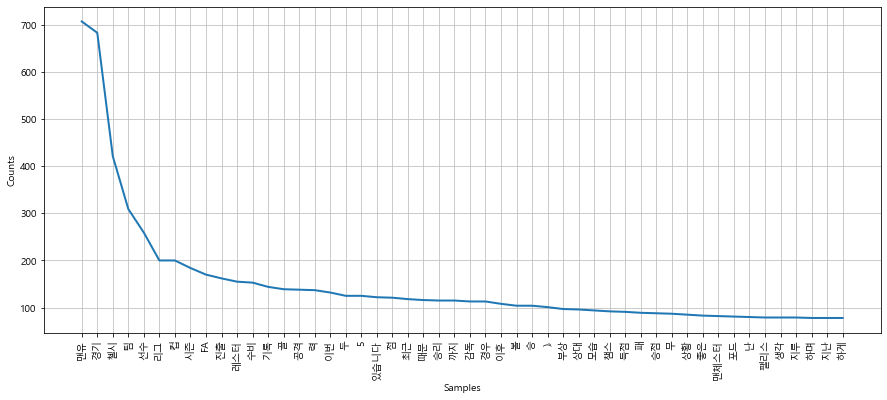

In [18]:
plt.figure(figsize=(15,6)) #15, 6 크기의 그래프를 그린다
ko.plot(50) # 50개의 데이터만을 사용
plt.show()

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [19]:
data = ko.vocab().most_common(300) #가장 빈도수가 높은 300개 단어만 추출해서 data 변수에 저장

print(len(data))
data

300


[('맨유', 707),
 ('경기', 683),
 ('첼시', 421),
 ('팀', 309),
 ('선수', 259),
 ('리그', 200),
 ('컵', 200),
 ('시즌', 184),
 ('FA', 170),
 ('진출', 162),
 ('레스터', 155),
 ('수비', 153),
 ('기록', 144),
 ('골', 139),
 ('공격', 138),
 ('력', 137),
 ('이번', 132),
 ('두', 125),
 ('5', 125),
 ('있습니다', 122),
 ('점', 121),
 ('최근', 118),
 ('때문', 116),
 ('승리', 115),
 ('까지', 115),
 ('감독', 113),
 ('경우', 113),
 ('이후', 108),
 ('볼', 104),
 ('승', 104),
 ('),', 101),
 ('부상', 97),
 ('상대', 96),
 ('모습', 94),
 ('챔스', 92),
 ('득점', 91),
 ('패', 89),
 ('승점', 88),
 ('무', 87),
 ('상황', 85),
 ('좋은', 83),
 ('맨체스터', 82),
 ('포드', 81),
 ('난', 80),
 ('팰리스', 79),
 ('생각', 79),
 ('지루', 79),
 ('하며', 78),
 ('지난', 78),
 ('하게', 78),
 ('데스', 77),
 ('하지만', 77),
 ('됩니다', 76),
 ('페르', 76),
 ('더', 74),
 ('포그바', 72),
 ('모두', 71),
 ('에는', 68),
 ('압박', 68),
 ('유나이티드', 67),
 ('시작', 67),
 ('가능성', 67),
 ('출전', 66),
 ('에서는', 66),
 ('현재', 65),
 ('선', 65),
 ('예상', 65),
 ('원정', 64),
 ('공', 61),
 ('솔샤르', 60),
 ('세', 59),
 ('패스', 59),
 ('재개', 59),
 ('우승', 59),
 ('가장', 

In [20]:
# list tuple을 딕셔너리로 만들어주는 함수
# 단어마다 빈도수를 찍어놓은 형태가 현재 리스트 안의 튜플 속에 있는 데 이를 딕셔너리로 만들려고 함

def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict

In [21]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

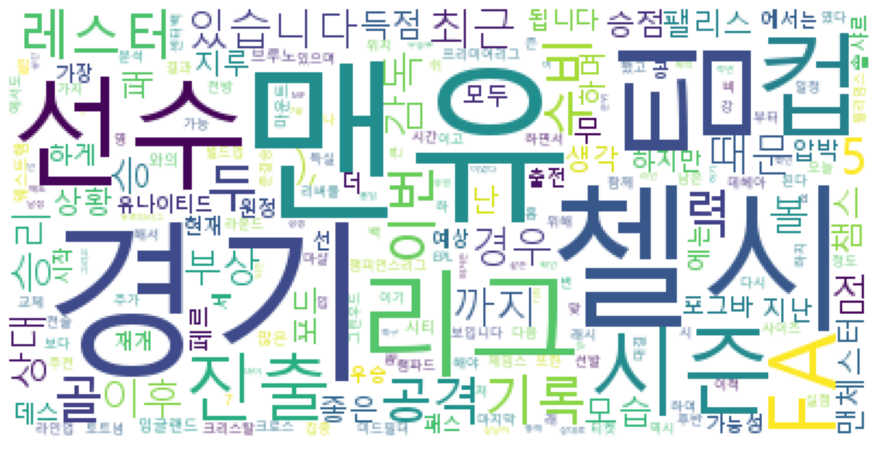

In [22]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      # realtive_scaling은 wordcloud의 글꼴 크기에 대한 빈도의 중요도를 표시
                      background_color='white',
                      ).generate_from_frequencies(todict(data))
                        # generate_from_frequencies은 빈도수에 알맞는 글자를 선별
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()